## 1. Data selection, reasons, and problem definition

In [51]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

percent = 0.1 #샘플 비율 지정

df_audi = pd.read_csv("audi.csv")
df_audi = df_audi.sample(round(len(df_audi)*percent))
df_bmw = pd.read_csv("audi.csv")
df_bmw = df_bmw.sample(round(len(df_bmw)*percent))
df_cclass = pd.read_csv("cclass.csv")
df_cclass = df_cclass.sample(round(len(df_cclass)*percent))
df_focus = pd.read_csv("focus.csv")
df_focus = df_focus.sample(round(len(df_focus)*percent))
df_ford = pd.read_csv("ford.csv")
df_ford = df_ford.sample(round(len(df_ford)*percent))
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.sample(round(len(df_hyundai)*percent))
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경

df_merc = pd.read_csv("merc.csv")
df_merc = df_merc.sample(round(len(df_merc)*percent))
df_skoda = pd.read_csv("skoda.csv")
df_skoda = df_skoda.sample(round(len(df_skoda)*percent))
df_toyota = pd.read_csv("toyota.csv")
df_toyota = df_toyota.sample(round(len(df_toyota)*percent))
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vauxhall = df_vauxhall.sample(round(len(df_vauxhall)*percent))
df_vw = pd.read_csv("vw.csv")
df_vw = df_vw.sample(round(len(df_vw)*percent))

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(10843, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5056,Santa Fe,2019,33950,Automatic,6813,Diesel,145.0,39.2,2.2
4822,EcoSport,2017,11599,Manual,12890,Petrol,145.0,52.3,1.0
937,A3,2019,21690,Semi-Auto,7836,Petrol,145.0,42.2,1.5
8210,Viva,2016,6495,Manual,28000,Petrol,20.0,62.8,1.0
9231,Grandland X,2019,17949,Automatic,13756,Diesel,150.0,47.1,2.0
7448,Auris,2016,13495,Automatic,35417,Hybrid,0.0,72.4,1.8
7647,Aygo,2015,5050,Manual,41700,Petrol,0.0,69.0,1.0
4323,Fiesta,2018,14500,Manual,4906,Petrol,150.0,49.6,1.0
10521,Golf,2016,14998,Manual,40289,Diesel,20.0,67.3,2.0
6979,Octavia,2017,16100,Automatic,12913,Diesel,145.0,61.4,2.0


In [52]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [53]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10843.0,10843.0,10843.0,9908.0,9908.0,10843.0
mean,2017.1,16873.3,23042.2,120.3,54.5,1.6
std,2.2,9546.2,21273.2,63.5,13.4,0.5
min,1997.0,675.0,1.0,0.0,2.8,0.0
25%,2016.0,10299.5,7537.0,125.0,45.6,1.2
50%,2017.0,14849.0,17033.0,145.0,54.3,1.5
75%,2019.0,20973.5,32390.0,145.0,61.7,2.0
max,2020.0,137500.0,259000.0,580.0,256.8,6.2


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10843 non-null  object 
 1   year          10843 non-null  int64  
 2   price         10843 non-null  int64  
 3   transmission  10843 non-null  object 
 4   mileage       10843 non-null  int64  
 5   fuelType      10843 non-null  object 
 6   tax           9908 non-null   float64
 7   mpg           9908 non-null   float64
 8   engineSize    10843 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 762.5+ KB


In [55]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

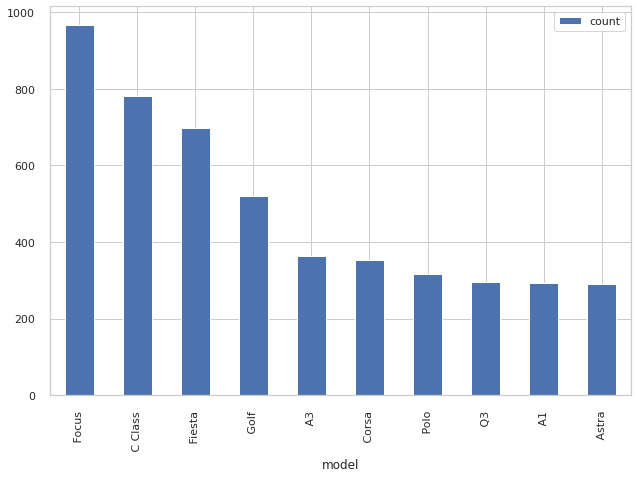

          count
model          
 Focus      967
 C Class    781
 Fiesta     697
 Golf       520
 A3         364
 Corsa      353
 Polo       316
 Q3         296
 A1         293
 Astra      290


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' A1', ' Astra'],
      dtype='object', name='model')

In [56]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus      967    13575.9
 C Class    781    23530.6
 Fiesta     697    10298.5
 Golf       520    16544.2
 A3         364    17660.5
 Corsa      353     8214.9
 Polo       316    11197.8
 Q3         296    23100.0
 A1         293    14343.1
 Astra      290    10462.5
14892.796286596882


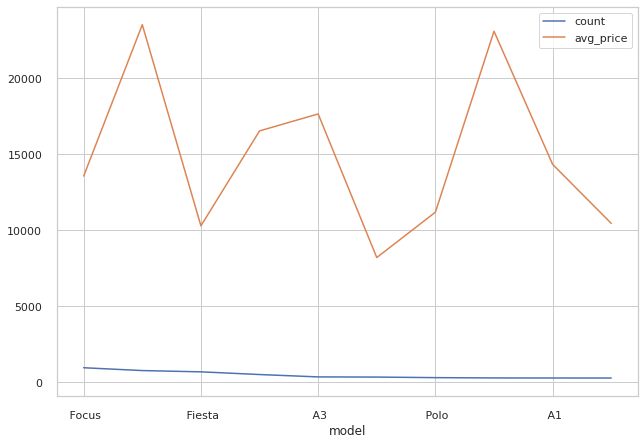

In [57]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [58]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus      967    13575.9    2017.1
 C Class    781    23530.6    2017.3
 Fiesta     697    10298.5    2016.9
 Golf       520    16544.2    2017.1
 A3         364    17660.5    2016.5
 Corsa      353     8214.9    2016.7
 Polo       316    11197.8    2016.8
 Q3         296    23100.0    2017.2
 A1         293    14343.1    2016.6
 Astra      290    10462.5    2016.8
2016.9116937251827


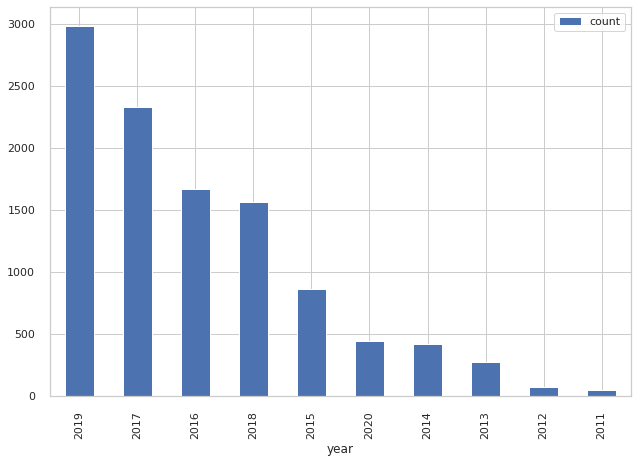

      count
year       
2019   2990
2017   2333
2016   1672
2018   1567
2015    861
2020    445
2014    422
2013    275
2012     73
2011     49


In [59]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

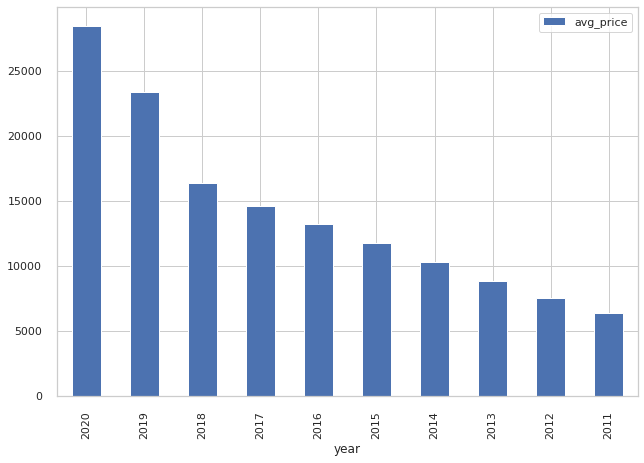

      avg_price
year           
2020    28503.2
2019    23387.1
2018    16375.2
2017    14623.5
2016    13254.8
2015    11793.2
2014    10289.7
2013     8843.2
2012     7527.0
2011     6387.5


In [60]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [61]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
3292,Fiesta,1998,2699,Manual,37000,Petrol,41.5,1.2


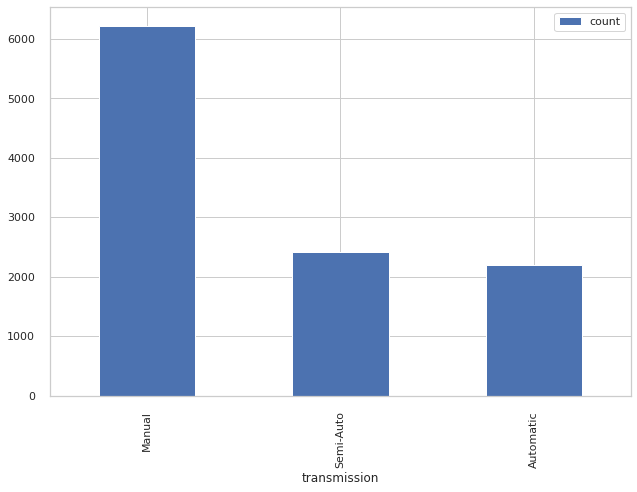

              count
transmission       
Manual         6225
Semi-Auto      2420
Automatic      2198


In [62]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

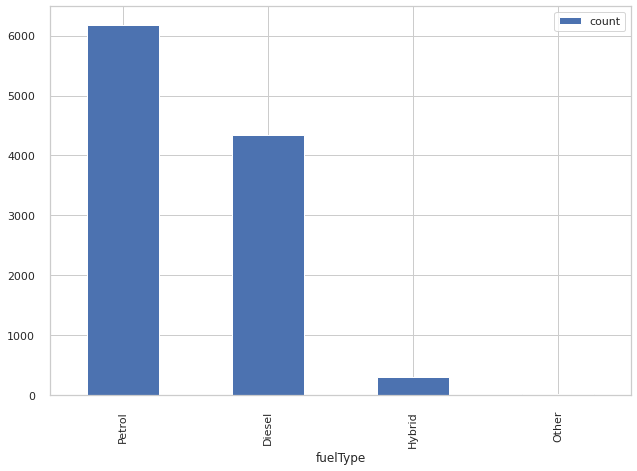

      avg_price
year           
2020    28503.2
2019    23387.1
2018    16375.2
2017    14623.5
2016    13254.8
2015    11793.2
2014    10289.7
2013     8843.2
2012     7527.0
2011     6387.5


In [63]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [64]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#Transmission: manual
#feul type: Petrol / diessel


## 2. Data preprocessing, EDA, and visualization

11

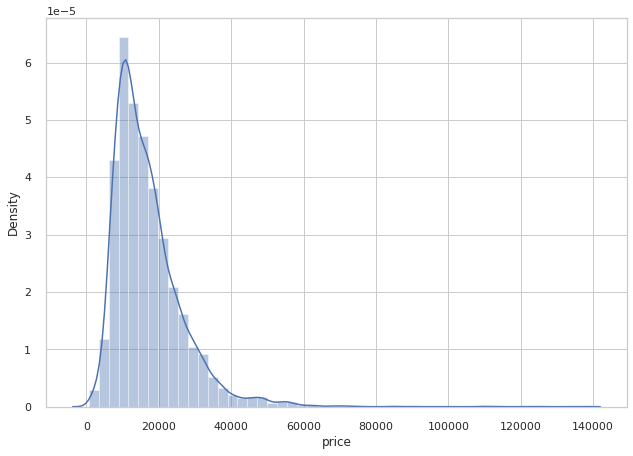

In [65]:
#Check "price" Outliers
sns.distplot(df['price'], kde=True, rug=False)
condition = (df["price"] >75000)
df[condition]["price"].count()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize


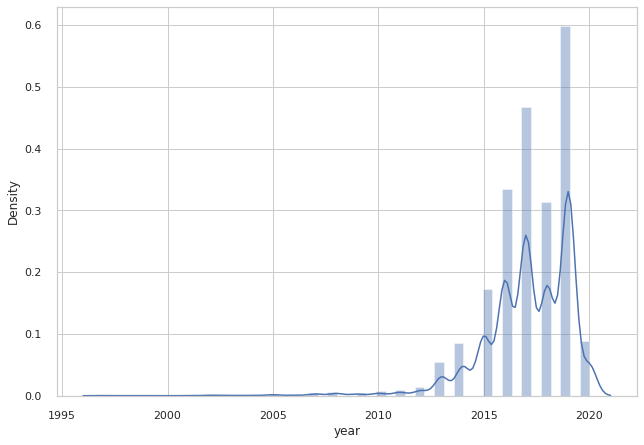

In [66]:
#Check "year" Outliers
sns.distplot(df['year'], kde=True, rug=False)
condition = (df["year"] >2020) | (df["year"] <1990)
df[condition]

6

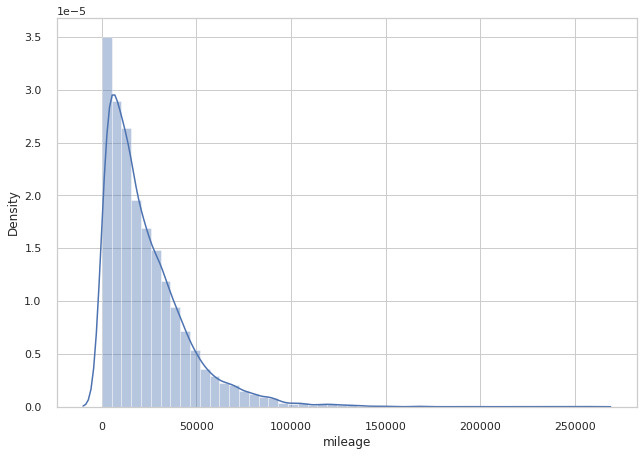

In [67]:
#Check "mileage" Outliers
sns.distplot(df['mileage'], kde=True, rug=False)
condition = (df["mileage"] >150000)
df[condition]["model"].count()

In [68]:
#Delete Outliers
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]

In [69]:
#fill null values with average of mpg
df = df.fillna(df.mean())

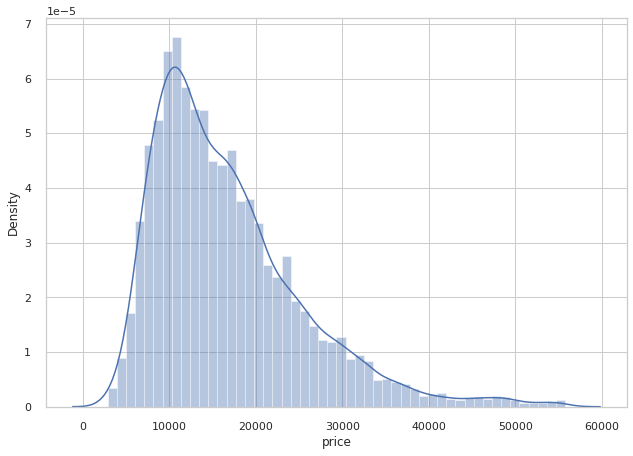

In [70]:
sns.distplot(df['price'], kde=True, rug=False)

22336.814630481735


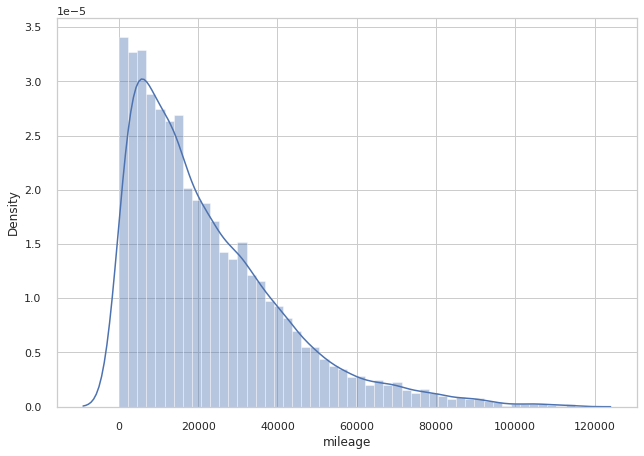

In [71]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

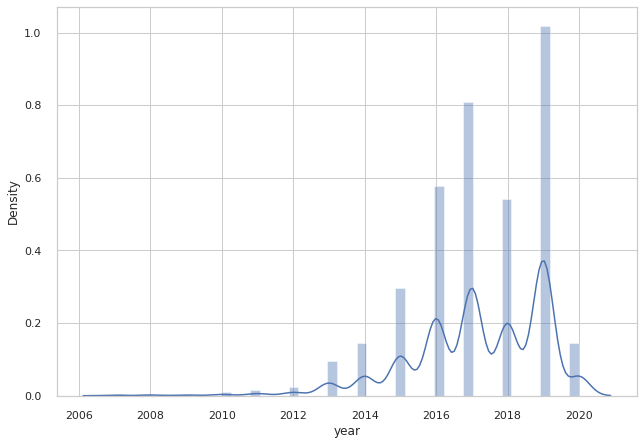

In [72]:
sns.distplot(df['year'], kde=True, rug=False)

In [73]:
# sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

In [74]:
# sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

In [75]:
# sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

In [76]:
# sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

In [77]:
# sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

In [78]:
# sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)

## 3. Modeling and model analysis

In [79]:
## train set, validation set, test set
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=None)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5963, 7)
y_train shape:  (5963,)
X_val shape:  (2556, 7)
y_val shape:  (2556,)
X_test shape:  (2130, 7)
y_test shape:  (2130,)


#### 3-0. Baseline Model

mean:  16715.902432153252
median:  14899.0


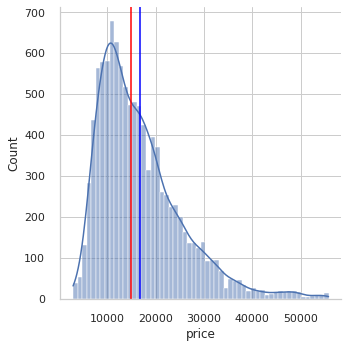

In [80]:
#Baseline Graph
price_mean = y_train.mean()

## SalePrice probability density function
sns.displot(df['price'], kde=True)

## draw mean value and median value on the graph
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
print("mean: ", df['price'].mean())
print("median: ", df['price'].median())

In [81]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

price_mean = y_train.mean()
y_pred_baseline = [price_mean] * len(y_val)

mse = mean_squared_error(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,77292425.1
1,MAE,6735.3
2,RMSE,8791.6
3,R2,-0.0


#### 3-1. Multiple Linear Regression

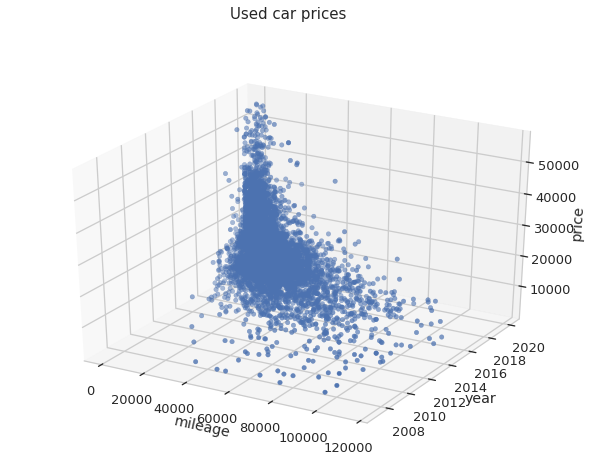

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(X_train['mileage'], X_train['year'], y_train)
ax.set_xlabel('mileage', labelpad=10)
ax.set_ylabel('year', labelpad=10)
ax.set_zlabel('price', labelpad=10)

plt.suptitle('Used car prices', fontsize=15)
plt.show()

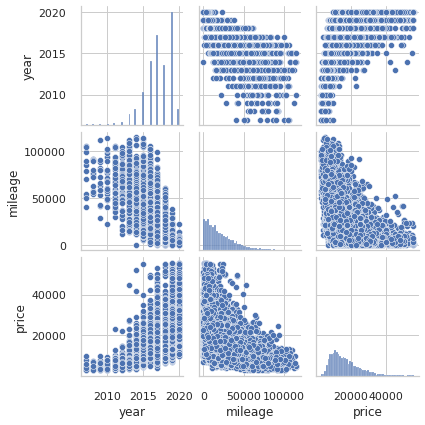

In [83]:
# Compare 3 important features: year, mileage, and price
sns.set(style='whitegrid', context='notebook')
cols = ['year', 'mileage','price']
sns.pairplot(df[cols], height=2);

In [84]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression

multiple_linear_model = LinearRegression()

# Select features
features = ["mileage", "year"]

X_train_mlinear = X_train[features]
X_val_mlinear = X_val[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# validation set
y_pred_val_linear = multiple_linear_model.predict(X_val_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_linear)
mae = mean_absolute_error(y_val, y_pred_val_linear)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_linear)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,55325832.5
1,MAE,5602.8
2,RMSE,7438.1
3,R2,0.3


y = -4204764 + -0.0348x₁ + 2093.1227x₂


y = 20839.3 + -0.186x₁


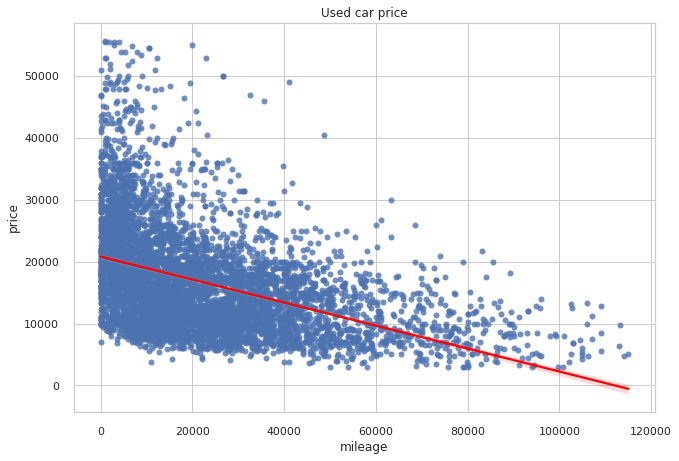

In [85]:
#Make linear regression for checking coefficient about mileage and price
import seaborn as sns
import numpy as np

linear_model = LinearRegression()
X_train_linear = X_train[["mileage"]]
linear_model.fit(X_train_linear, y_train)

## Coefficient or parameters
b0 = linear_model.intercept_
b1 = float(linear_model.coef_)

print(f'y = {b0:.1f} + {b1:.3f}x\u2081')

sns.regplot(x=X_train_linear, y=y_train, line_kws={"color": "red"}).set_title('Used car price');

In [86]:
X_train.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
2863,Focus,2013,Manual,65125,Petrol,54.8,1.6
5316,I30,2019,Manual,1848,Petrol,34.0,2.0
2417,C Class,2014,Manual,23000,Petrol,54.8,2.0


In [87]:
#categorical type checking
print("model: ",len(X_train.groupby("model")))
print("transmission: ",len(X_train.groupby("transmission")))
print("fuelType: ",len(X_train.groupby("fuelType")))

model:  131
transmission:  3
fuelType:  4


In [88]:
# ordinal encoder and standard scaler
!pip install category_encoders

# from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## 원핫 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
ord_enc = OrdinalEncoder(handle_missing="value")
scaler = StandardScaler()

X_train_ord_enc = ord_enc.fit_transform(X_train)
X_val_ord_enc = ord_enc.transform(X_val)
X_test_ord_enc = ord_enc.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_ord_enc)
X_val_scaled = scaler.transform(X_val_ord_enc)
X_test_scaled = scaler.transform(X_test_ord_enc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
X_train_ord_enc.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
2863,1,2013,1,65125,1,54.8,1.6
5316,2,2019,1,1848,1,34.0,2.0
2417,3,2014,1,23000,1,54.8,2.0


1 features
Selected names:  Index(['engineSize'], dtype='object')
Test MAE: $5,248
Test R2: 0.4075988985268144 

2 features
Selected names:  Index(['year', 'engineSize'], dtype='object')
Test MAE: $3,469
Test R2: 0.7207541593658016 

3 features
Selected names:  Index(['year', 'transmission', 'engineSize'], dtype='object')
Test MAE: $3,318
Test R2: 0.7412166447573953 

4 features
Selected names:  Index(['year', 'transmission', 'mileage', 'engineSize'], dtype='object')
Test MAE: $3,202
Test R2: 0.75557433278092 

5 features
Selected names:  Index(['year', 'transmission', 'mileage', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,137
Test R2: 0.7614496933664381 

6 features
Selected names:  Index(['year', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,139
Test R2: 0.7613808004572513 

7 features
Selected names:  Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')
Test MAE: $3,119
Te

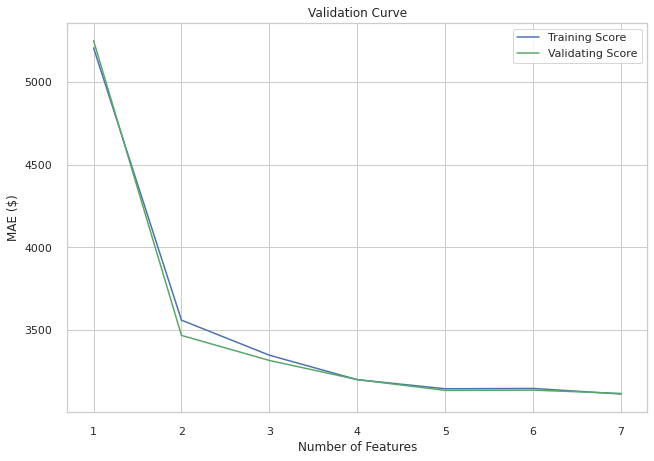

In [90]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train_ord_enc.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train_ord_enc.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_ord_enc, y_train)
    X_val_selected = selector.transform(X_val_ord_enc)
    
    all_names = X_train_ord_enc.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label= "Validating Score", color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [91]:
# Tunning hyperparameters and features for Multiple_linear_model

# Select features
features = ['engineSize', 'transmission', 'year']

X_train_mlinear_new = X_train_ord_enc[features]
X_val_mlinear_new = X_val_ord_enc[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear_new, y_train)

# validation set
y_pred_val_mlinear_new = multiple_linear_model.predict(X_val_mlinear_new)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_mlinear_new)
mae = mean_absolute_error(y_val, y_pred_val_mlinear_new)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_mlinear_new)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2, b3 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082 + {b3:.4f}x\u2083')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,19991435.6
1,MAE,3317.8
2,RMSE,4471.2
3,R2,0.7


y = -4841601 + 9056.7975x₁ + 2162.7929x₂ + 2399.4176x₃


#### 3-2. Ridge Regression

Ridge Regression, alpha=0.001
Validation MAE: $3,119
Validation R2: 0.762


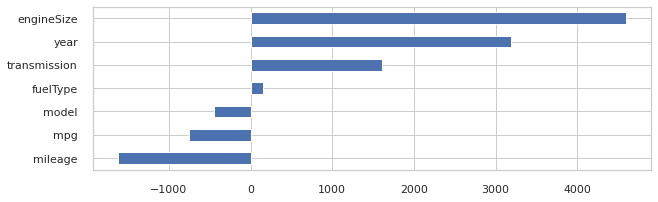

Ridge Regression, alpha=0.005
Validation MAE: $3,120
Validation R2: 0.761


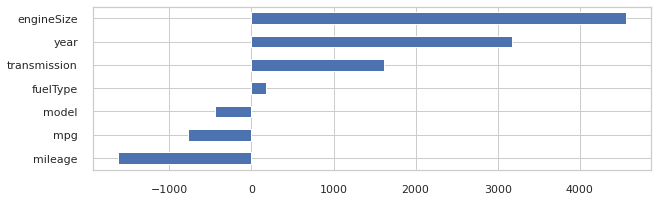

Ridge Regression, alpha=0.01
Validation MAE: $3,122
Validation R2: 0.761


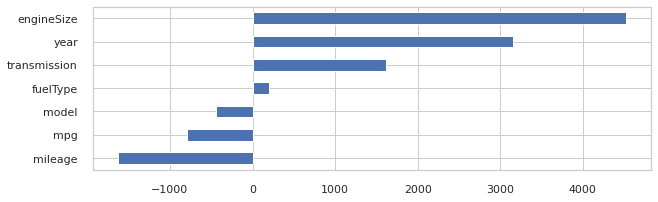

Ridge Regression, alpha=0.02
Validation MAE: $3,125
Validation R2: 0.760


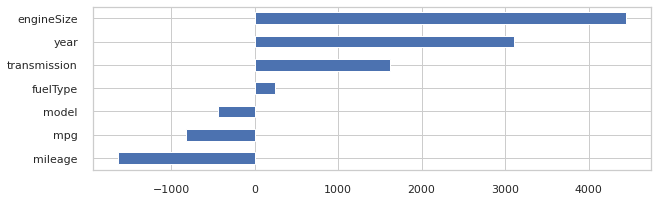

Ridge Regression, alpha=0.03
Validation MAE: $3,128
Validation R2: 0.759


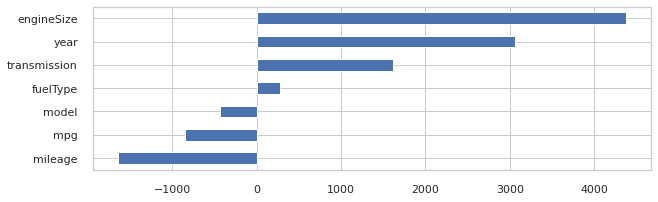

Ridge Regression, alpha=0.05
Validation MAE: $3,136
Validation R2: 0.757


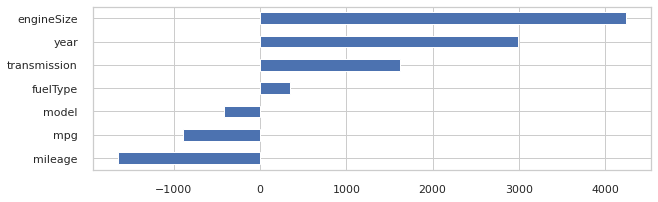

Ridge Regression, alpha=0.07
Validation MAE: $3,145
Validation R2: 0.755


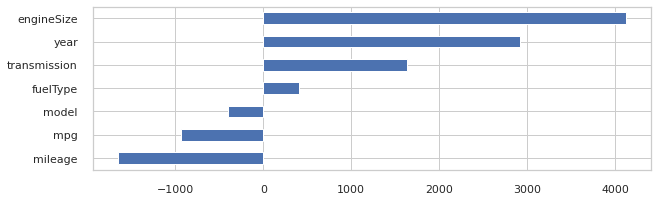

Ridge Regression, alpha=1.0
Validation MAE: $3,845
Validation R2: 0.626


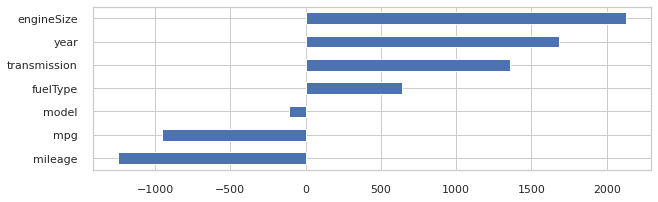

Ridge Regression, alpha=10.0
Validation MAE: $5,983
Validation R2: 0.194


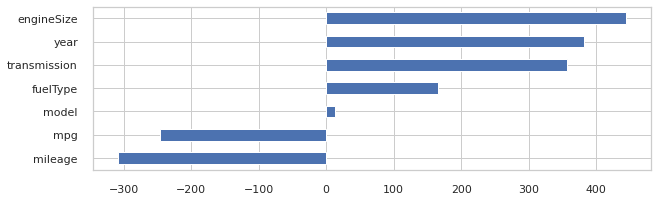

In [92]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 1.0, 10.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    Ridge_model = Ridge(alpha=alpha, normalize=True)  
    Ridge_model.fit(X_train_scaled, y_train)
    y_pred = Ridge_model.predict(X_val_scaled)

    # MAE for test
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f'Validation MAE: ${mae:,.0f}')
    print(f'Validation R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(Ridge_model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()


In [93]:
#Best Ridge Model
Ridge_model = Ridge(alpha=0.05, normalize=True)  
Ridge_model.fit(X_train_scaled, y_train)
y_pred_val_Ridge = Ridge_model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred_val_Ridge)
mae = mean_absolute_error(y_val, y_pred_val_Ridge)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_Ridge)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,18736595.9
1,MAE,3136.3
2,RMSE,4328.6
3,R2,0.8


#### 3-3. Random Forest

In [96]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(handle_missing="value"), 
    SimpleImputer(), 
    RandomForestRegressor(n_estimators=10, random_state=None, n_jobs=-1)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.9137701623282679


In [102]:
# Check feature importances
# 랜덤포레스트에서는 학습 후에 특성들의 중요도 정보(Gini importance)를 기본으로 제공합니다. 
# 중요도는 노드들의 지니불순도(Gini impurity)를 가지고 계산하는데, 노드가 중요할 수록 불순도가 크게 감소한다는 사실을 이용합니다.
# 노드는 한 특성의 값을 기준으로 분리가 되기 때문에 불순도를 크게 감소하는데 많이 사용된 특성이 중요도가 올라갈 것입니다.

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

pipe = make_pipeline(
    # TargetEncoder(), 
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    # 'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    # 'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=20, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [104]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.652627497654589, 'randomforestregressor__n_estimators': 480, 'simpleimputer__strategy': 'mean'}
MAE:  1732.1244869429156


In [105]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,6011034.3
1,MAE,1603.6
2,RMSE,2451.7
3,R2,0.9


In [109]:
a = pipe.named_steps['randomforestregressor']

RandomForestRegressor(max_depth=20, max_features=0.652627497654589,
                      n_estimators=480)

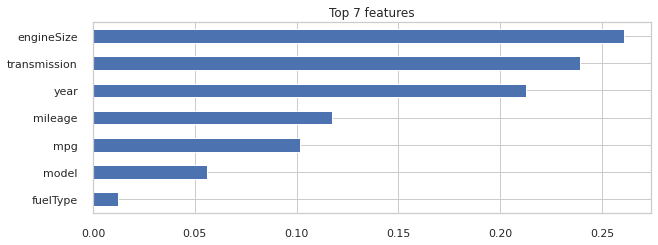

In [111]:
# Feature Importances(Mean decrease impurity, MDI)

# sklearn 트리 기반 분류기에서 디폴트로 사용되는 특성 중요도는 속도는 빠르지만 결과를 주의해서 봐야 합니다. 
# 각각 특성을 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값입니다.

rf = pipe.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [133]:
# Permutation Importance, Mean Decrease Accuracy,MDA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipe.fit(X_train, y_train)

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # regressor
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [134]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

engineSize     3319.8
year           2230.7
transmission   1244.1
model           883.4
mpg             864.6
mileage         826.2
fuelType         80.7
dtype: float64

In [135]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
3319.8041 ± 99.5831,engineSize
2230.7374 ± 87.5847,year
1244.0734 ± 112.1287,transmission
883.4076 ± 72.3510,model
864.6332 ± 24.9463,mpg
826.1993 ± 67.1009,mileage
80.6582 ± 13.0347,fuelType


#### 3-4. Permutation importance, pdp, shap